In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import random


![Starbucks](https://i.insider.com/57a1ff2b1bc7091c008b4592?width=700)

## alterantively we can use pandas for easily converting data in to DF

In [48]:
inp_file  = "starbucks.csv"
drinks_df = pd.read_csv(inp_file)

In [49]:
drinks_df.shape

(242, 18)

In [50]:
drinks_df.head()


,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


# cleaning the data and handling missing values

In [51]:
drinks_df.isna().sum()


Beverage_category            0
Beverage                     0
Beverage_prep                0
Calories                     0
 Total Fat (g)               0
Trans Fat (g)                0
Saturated Fat (g)            0
 Sodium (mg)                 0
 Total Carbohydrates (g)     0
Cholesterol (mg)             0
 Dietary Fibre (g)           0
 Sugars (g)                  0
 Protein (g)                 0
Vitamin A (% DV)             0
Vitamin C (% DV)             0
 Calcium (% DV)              0
Iron (% DV)                  0
Caffeine (mg)                1
dtype: int64

## dropping the rows with empty values 

In [52]:
drinks_df.dropna(inplace = True)
drinks_df.duplicated().sum()

0

## getting the data types of the columns in drinks_data

In [53]:
drinks_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          241 non-null    object 
 1   Beverage                   241 non-null    object 
 2   Beverage_prep              241 non-null    object 
 3   Calories                   241 non-null    int64  
 4    Total Fat (g)             241 non-null    object 
 5   Trans Fat (g)              241 non-null    float64
 6   Saturated Fat (g)          241 non-null    float64
 7    Sodium (mg)               241 non-null    int64  
 8    Total Carbohydrates (g)   241 non-null    int64  
 9   Cholesterol (mg)           241 non-null    int64  
 10   Dietary Fibre (g)         241 non-null    int64  
 11   Sugars (g)                241 non-null    int64  
 12   Protein (g)               241 non-null    float64
 13  Vitamin A (% DV)           241 non-null    object 
 14 

### few columns are have different datatypes such as string object , so i'll convert them to float by stripping the '%' symbol

In [54]:
drinks_df.columns

Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
       ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
       ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
       ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)'],
      dtype='object')

### changing 'Vitamin A (% DV) ', 'Vitamin C (% DV)',' Calcium (% DV) ', 'Iron (% DV) ' columns to float data type

### the 'Caffeine (mg)' column has few rows with 'Varies' i replaced with mean values for those rows

In [55]:
colmns_tbc = [' Total Fat (g)','Vitamin A (% DV) ', 'Vitamin C (% DV)',' Calcium (% DV) ', 'Iron (% DV) ']
drinks_df[' Total Fat (g)'] = drinks_df[' Total Fat (g)'].str.replace(' ','.')
drinks_df['Caffeine (mg)'] = pd.to_numeric(drinks_df['Caffeine (mg)'],errors = 'coerce')
mean_caf = round(drinks_df['Caffeine (mg)'].mean(),2)
drinks_df.isna().sum()


Beverage_category             0
Beverage                      0
Beverage_prep                 0
Calories                      0
 Total Fat (g)                0
Trans Fat (g)                 0
Saturated Fat (g)             0
 Sodium (mg)                  0
 Total Carbohydrates (g)      0
Cholesterol (mg)              0
 Dietary Fibre (g)            0
 Sugars (g)                   0
 Protein (g)                  0
Vitamin A (% DV)              0
Vitamin C (% DV)              0
 Calcium (% DV)               0
Iron (% DV)                   0
Caffeine (mg)                22
dtype: int64

In [56]:
drinks_df['Caffeine (mg)'].fillna(mean_caf,inplace = True)

drinks_df[colmns_tbc] = drinks_df[colmns_tbc].apply(lambda x:x.str.strip("%")).astype(float)

mean_caf

89.52

### the final data  types of the Data frame Drinks_df

In [57]:
drinks_df.head()
drinks_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beverage_category          241 non-null    object 
 1   Beverage                   241 non-null    object 
 2   Beverage_prep              241 non-null    object 
 3   Calories                   241 non-null    int64  
 4    Total Fat (g)             241 non-null    float64
 5   Trans Fat (g)              241 non-null    float64
 6   Saturated Fat (g)          241 non-null    float64
 7    Sodium (mg)               241 non-null    int64  
 8    Total Carbohydrates (g)   241 non-null    int64  
 9   Cholesterol (mg)           241 non-null    int64  
 10   Dietary Fibre (g)         241 non-null    int64  
 11   Sugars (g)                241 non-null    int64  
 12   Protein (g)               241 non-null    float64
 13  Vitamin A (% DV)           241 non-null    float64
 14 

# ***EDA***

In [58]:
starbucks_green = '#00704A'



# ***Visualization 1***

## **this horizantal bar graph shows the number of beverages under each Beverage Category**


Text(0.5, 1.0, 'Beverage Category Counts')

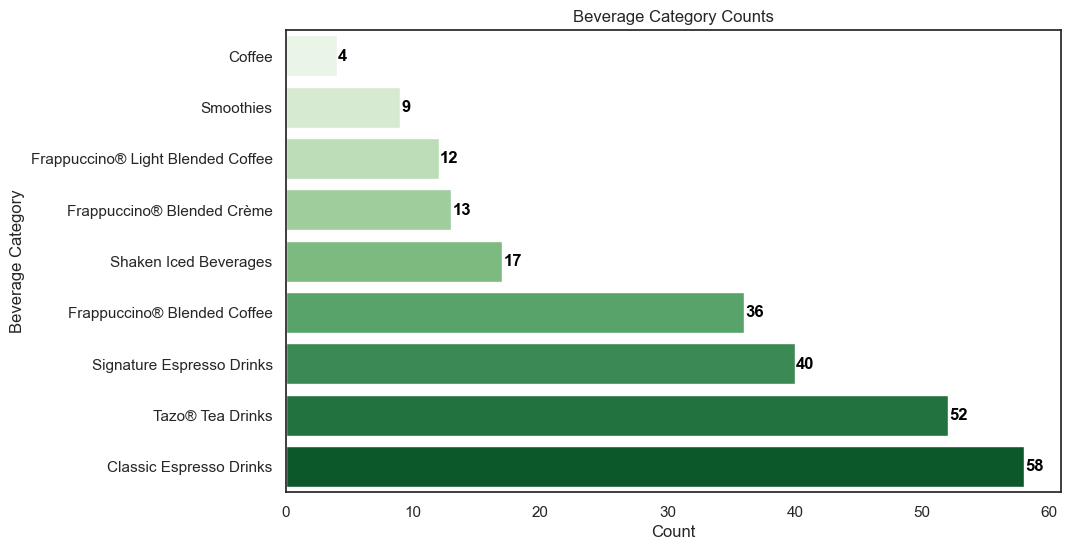

In [59]:

bev_counts = drinks_df['Beverage_category'].value_counts().sort_values(ascending=True)

sb.set(style="white")

plt.figure(figsize=(10, 6))
ax = sb.barplot(x=bev_counts, y=bev_counts.index,palette= ("Greens"),hue=bev_counts.index)


# Annotate each bar with its count
for i, v in enumerate(bev_counts):
    ax.text(v + 0.1, i, str(v), color='black', va='center', fontweight='bold')

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Beverage Category')
plt.title('Beverage Category Counts')

# 

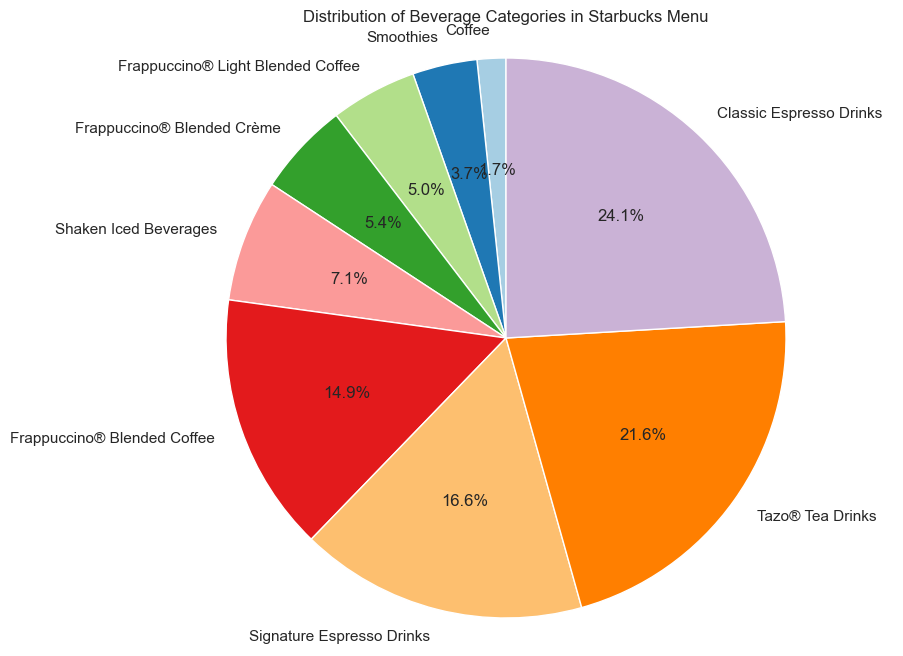

In [74]:

plt.figure(figsize=(10, 8))

pie_chart = plt.pie(bev_counts, labels=bev_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

plt.axis('equal')

plt.title('Distribution of Beverage Categories in Starbucks Menu')
plt.show()


# ***Visualization 2***

## **Average Nutrition Values in a Starbucks Beverage**

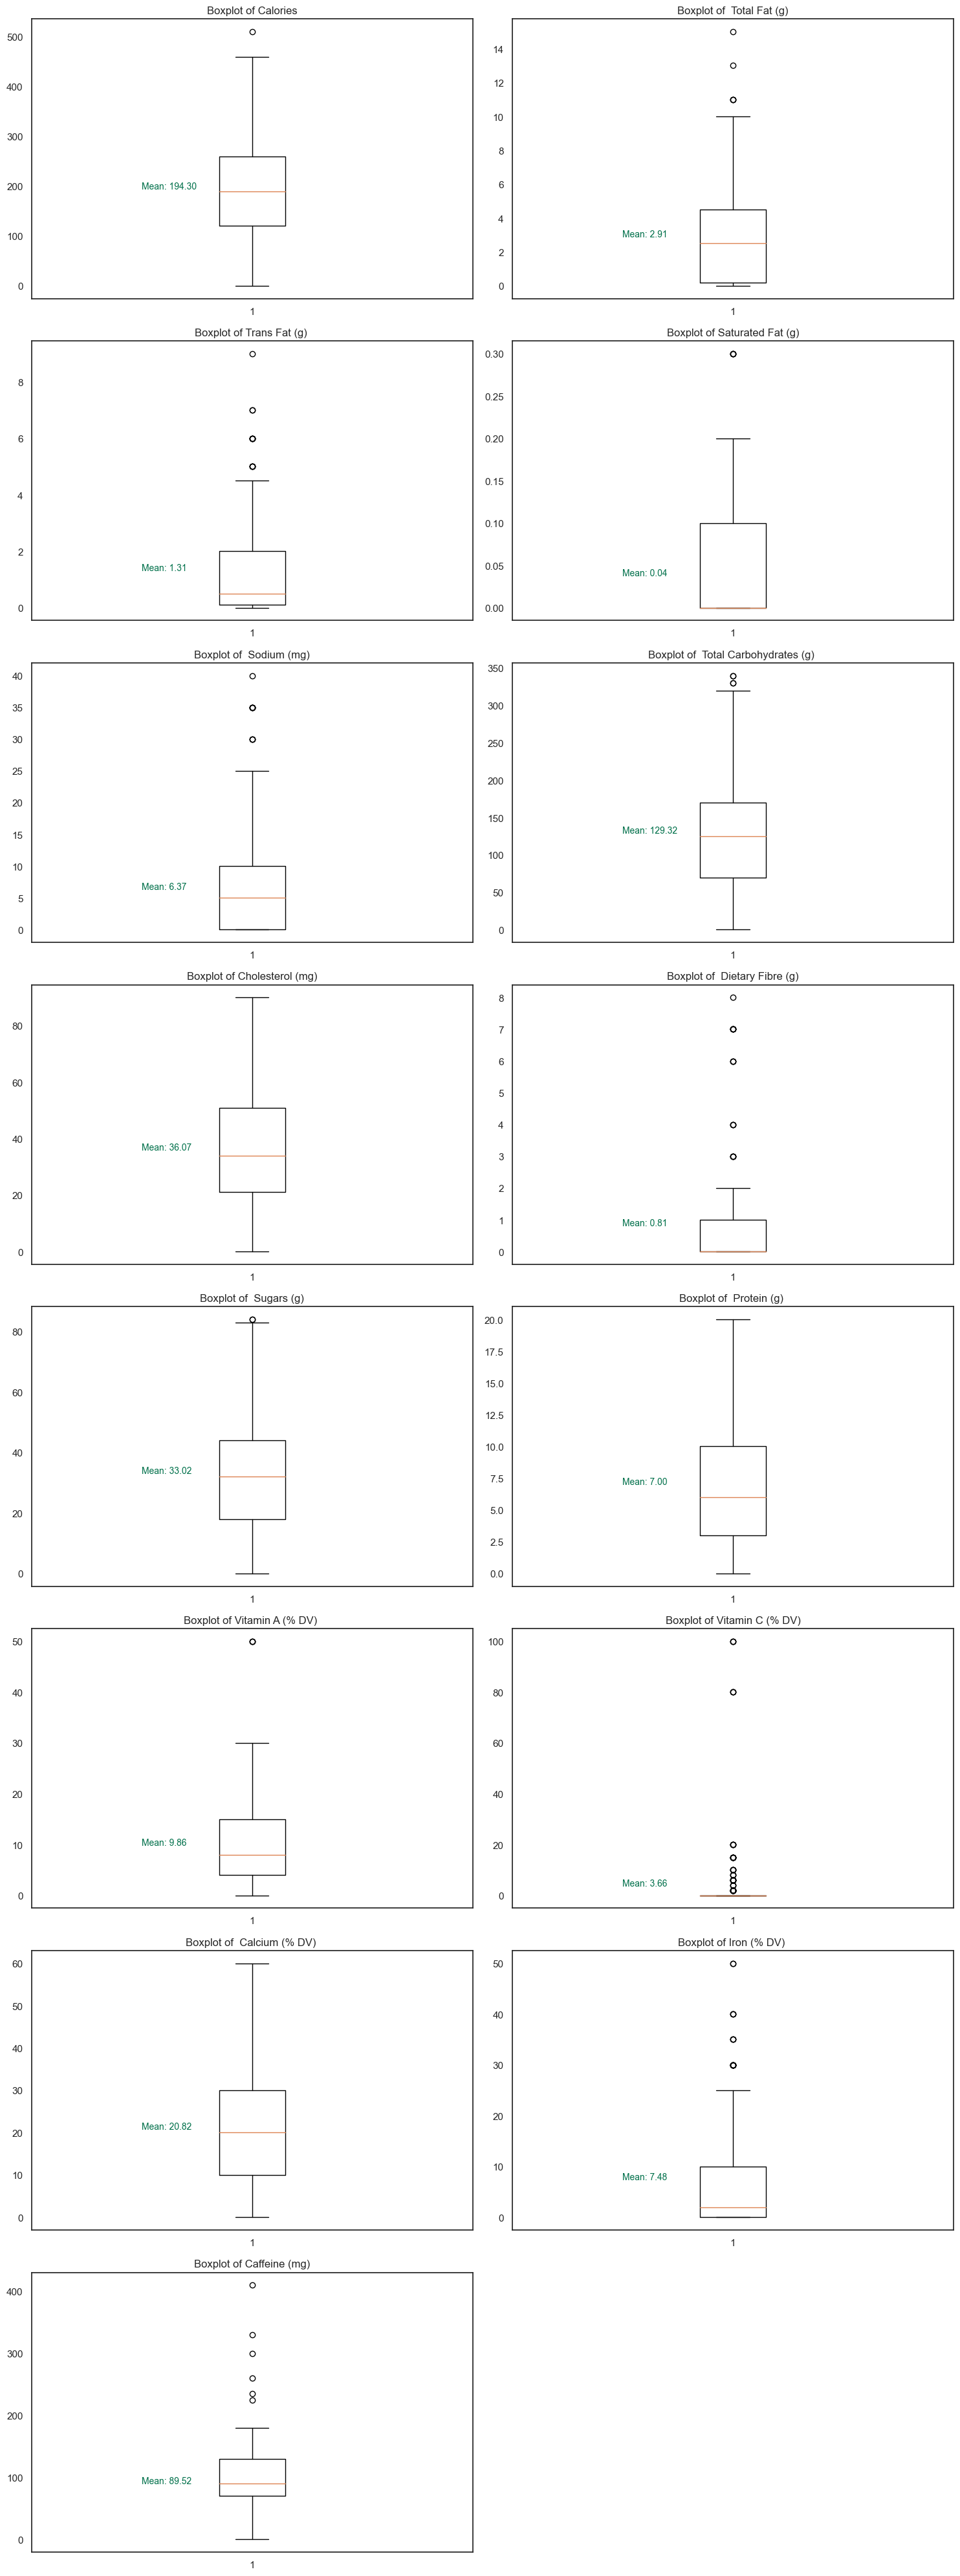

In [61]:
import matplotlib.pyplot as plt
import math

nut_columns = ['Calories', ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
                    ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
                    ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
                    ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)']

df_sub = drinks_df[nut_columns]
num_columns = len(nut_columns)
num_rows = math.ceil(num_columns / 2)
plt.figure(figsize=(15, 5 * num_rows))
for i, column in enumerate(df_sub.columns, 1):
    plt.subplot(num_rows, 2, i)
    plt.boxplot(df_sub[column])
    mean_value = df_sub[column].mean()
    plt.text(0.75, mean_value, f'Mean: {mean_value:.2f}', color= starbucks_green, fontsize=10)
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()



# ***Visualization 3***

## **Plotting Bar plot of calories in Beverages**

C:\Users\HP\AppData\Local\Temp\ipykernel_17752\2123171731.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(data=drinks_df, y='Calories', x='Beverage',palette = "viridis").set(title="Calories in Item Type")


Text(0.5, 1.0, 'Starbucks Beverage Calories')

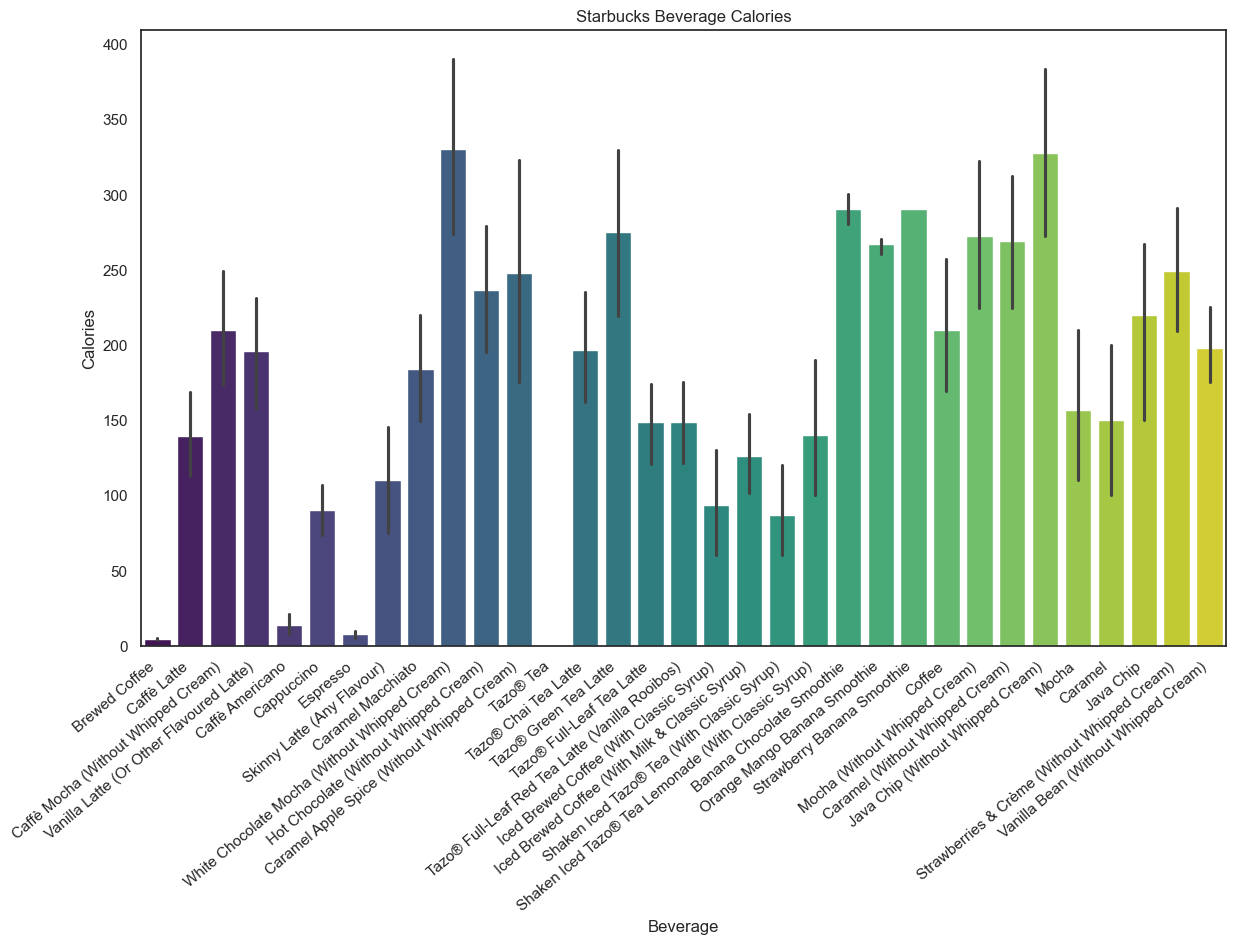

In [102]:
plt.figure(figsize=(14, 8))

sb.barplot(data=drinks_df, y='Calories', x='Beverage',palette = "viridis").set(title="Calories in Item Type")
plt.xticks(rotation=40, ha='right')
plt.title("Starbucks Beverage Calories")


## Distribution of various nutrition Values

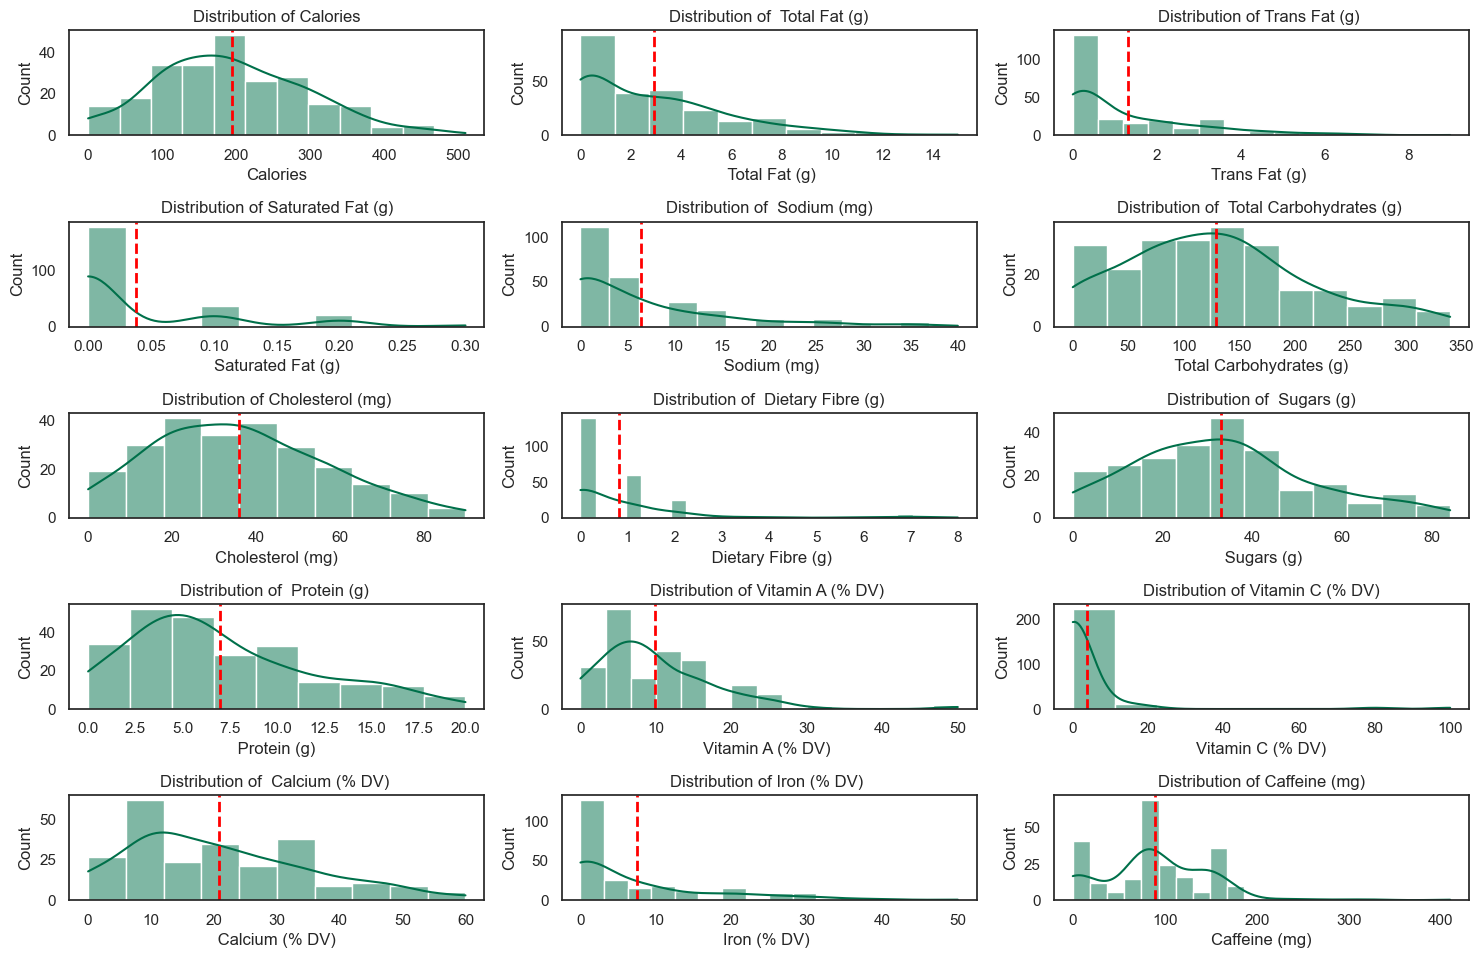

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0.0,0.0,0.0,0.0,175.0
1,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0.0,0.0,0.0,0.0,260.0
2,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,0.0,0.0,330.0
3,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0.0,0.0,2.0,0.0,410.0
4,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10.0,0.0,20.0,0.0,75.0


In [68]:
plt.figure(figsize=(15, 15))

included_columns = ['Calories', ' Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)', ' Sodium (mg)',
                    ' Total Carbohydrates (g) ', 'Cholesterol (mg)', ' Dietary Fibre (g)',
                    ' Sugars (g)', ' Protein (g) ', 'Vitamin A (% DV) ', 'Vitamin C (% DV)',
                    ' Calcium (% DV) ', 'Iron (% DV) ', 'Caffeine (mg)']

df_subset = drinks_df[included_columns]
df_subset.head()

for i, column in enumerate(df_subset.columns, 1):
    plt.subplot(8, 3, i)
    sb.histplot(df_subset[column], kde=True,color = starbucks_green)
    
    mean_value = df_subset[column].mean()
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()
df_subset.head()

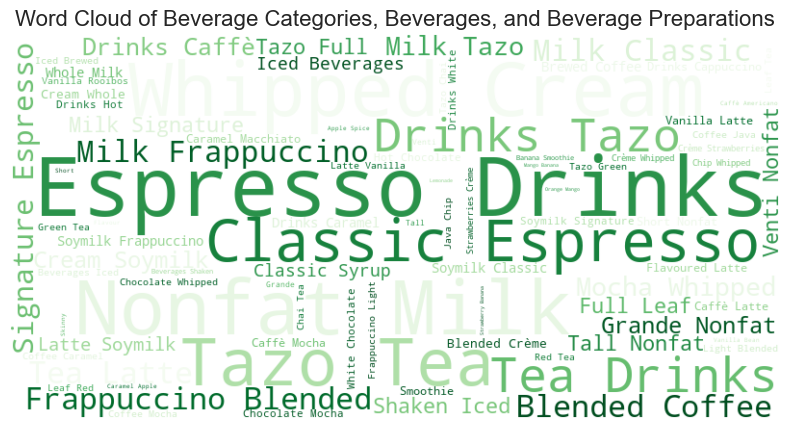

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
random.seed(123)
# Combining the text from the three columns
text = ' '.join(drinks_df['Beverage_category'] + ' ' + drinks_df['Beverage'] + ' ' + drinks_df['Beverage_prep'])
text = text.strip('Without').replace('Without','')
# Create a WordCloud object with a green color theme
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(text)

# Display the WordCloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Beverage Categories, Beverages, and Beverage Preparations', fontsize=16)
plt.show()


## correlation analysis

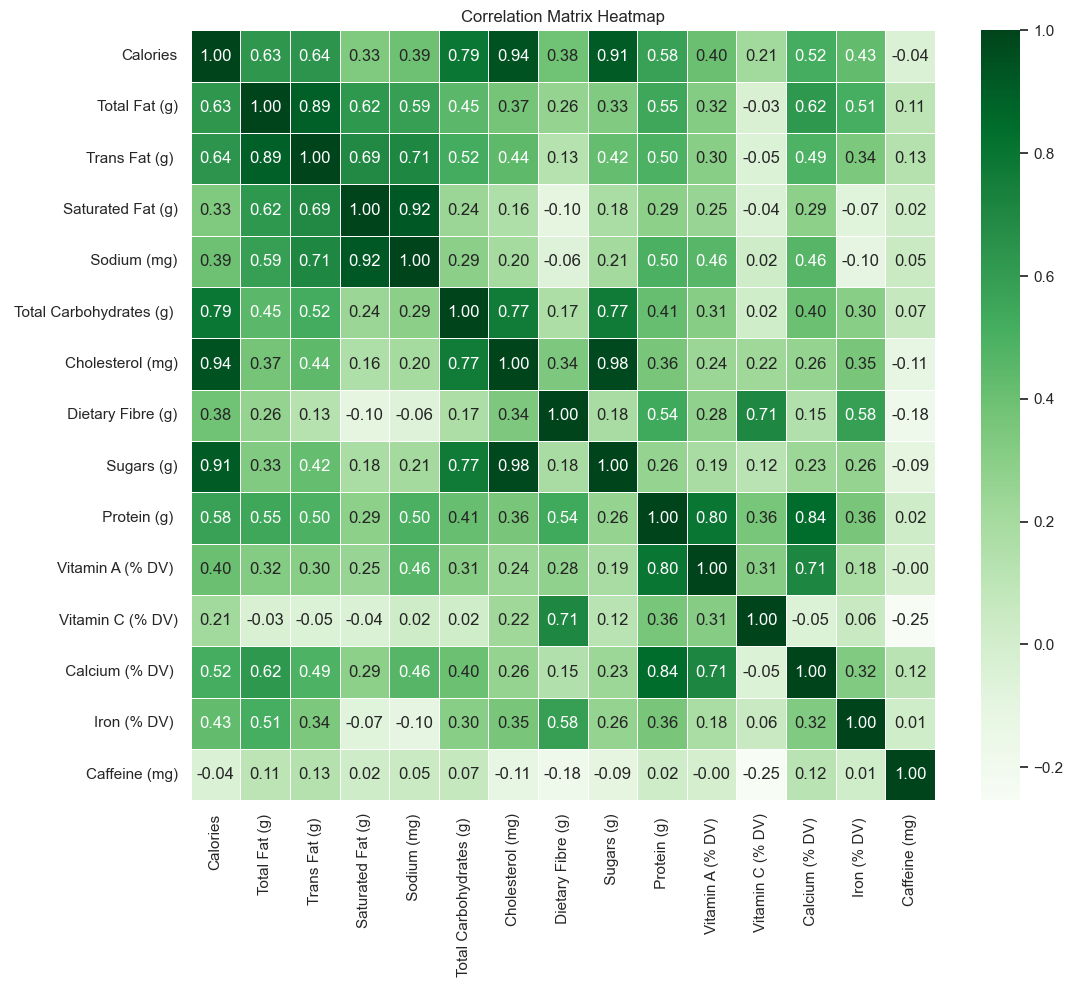

In [70]:
cor_df= drinks_df.drop(columns=['Beverage_category', 'Beverage', 'Beverage_prep'])
cor_df.isnull().sum()

# Calculating the correlation matrix
correlation_matrix = cor_df.corr()

# Creating a heatmap using Seaborn
plt.figure(figsize=(12, 10))
sb.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# Scatter plots of calories vs sugar
# Scatter plot of calories vs cholestorol
# Scatter plot of cholesterol vs sugar

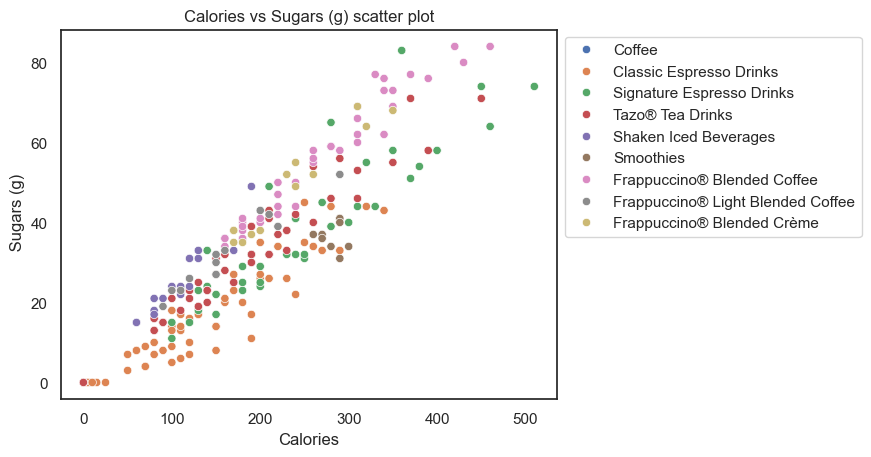

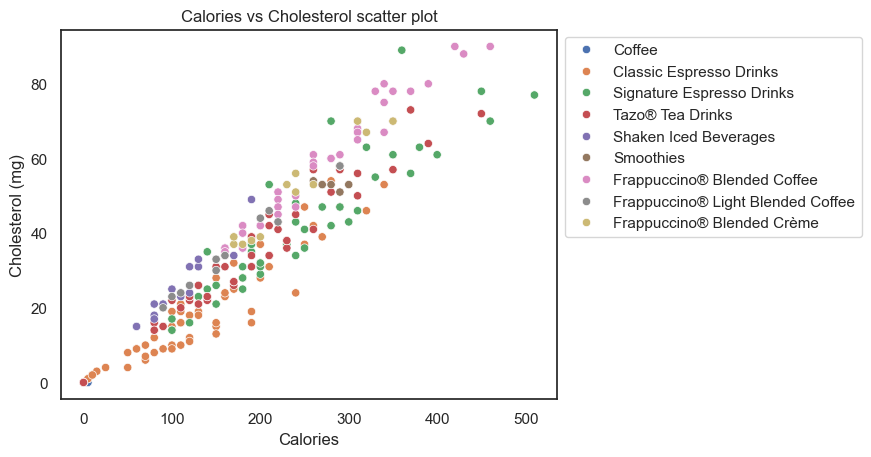

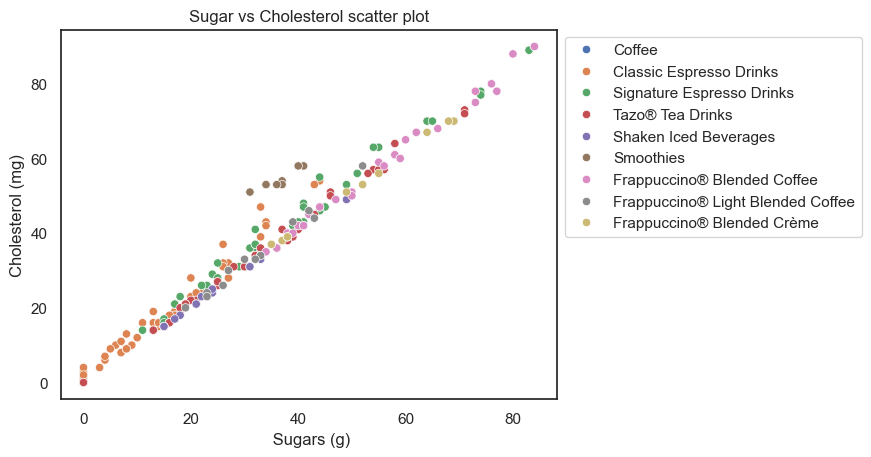

In [131]:
# Calories vs Sugars (g)
v1= sb.scatterplot(data=drinks_df, x="Calories", y=" Sugars (g)", hue="Beverage_category")
plt.title("Calories vs Sugars (g) scatter plot")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()
# Calories vs Cholesterol
v2= sb.scatterplot(data=drinks_df, x="Calories", y="Cholesterol (mg)", hue="Beverage_category")
plt.title("Calories vs Cholesterol scatter plot")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Calories vs Cholesterol
v2= sb.scatterplot(data=drinks_df, x=" Sugars (g)", y="Cholesterol (mg)", hue="Beverage_category")
plt.title("Sugar vs Cholesterol scatter plot")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [ ]:
## we can see there is strong corelationship between sugars and calories and cholesterol